<a href="https://colab.research.google.com/github/analyst-ujjwal/Titanic_project_ML/blob/main/Titanic_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
train = pd.read_csv('/content/train.csv')

In [220]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [221]:
test= pd.read_csv('/content/test.csv')

In [222]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [223]:
train.drop('Cabin', axis = 1, inplace = True)

In [224]:
test.drop('Cabin', axis = 1, inplace = True)

In [225]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [226]:
train['Embarked'].fillna('C', inplace = True)

/tmp/ipython-input-4093497045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('C', inplace = True)


In [227]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

/tmp/ipython-input-1610171641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace = True)


In [228]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [229]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std(), size =177)

In [230]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std(), size =86)

In [231]:
train['Age'][train['Age'].isnull()] = train_age

/tmp/ipython-input-1833702416.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] = train_age
/tmp/ipython-input-1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [232]:
test['Age'][test['Age'].isnull()] = test_age

/tmp/ipython-input-4013316382.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()] = test_age
/tmp/ipython-input-4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [233]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [234]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [235]:
train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [236]:
train.groupby(['Pclass'])['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [237]:
train.drop('Name', axis=1, inplace= True)

In [238]:
test.drop('Name', axis=1, inplace= True)

In [239]:
train.groupby(['Sex'])['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [240]:
train.groupby(['Embarked'])['Survived'].mean()

,Survived
Embarked,
C,0.558824
Q,0.389610
S,0.336957


/tmp/ipython-input-3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
/tmp/ipython-input-3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

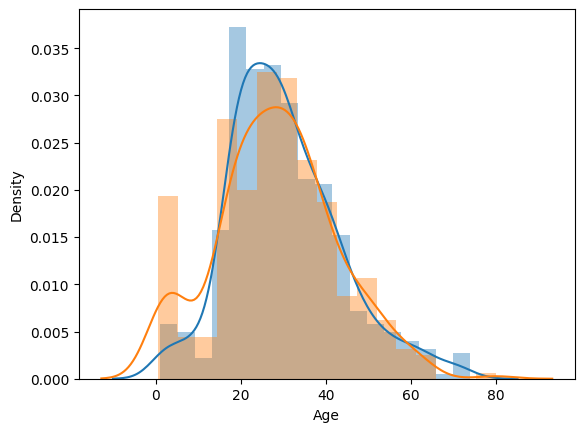

In [241]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

In [242]:
train.drop('Ticket', axis = 1, inplace= True)
test.drop('Ticket', axis = 1, inplace= True)

In [243]:
train['family'] = train['SibSp'] + train['Parch'] + 1
test['family'] = test['SibSp'] + test['Parch'] + 1

In [244]:
train['family'].value_counts()

,count
family,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [245]:
train.groupby(['family'])['Survived'].mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [246]:
def cal(number):
  if number ==1:
    return 'Alone'
  elif number>1 and number<5:
    return 'Medium'
  else:
    return 'Large'

In [247]:
train['family_size'] = train['family'].apply(cal)
test['family_size'] = test['family'].apply(cal)

In [248]:
train['family_size']

,family_size
0,Medium
1,Medium
2,Alone
3,Medium
4,Alone
...,...
886,Alone
887,Alone
888,Medium
889,Alone


In [249]:
train.drop(columns = ['SibSp','Parch', 'family'], inplace=True)

In [250]:
test.drop(columns = ['SibSp','Parch', 'family'], inplace=True)

In [251]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,1,0,3,male,22.0,7.2500,S,Medium
1,2,1,1,female,38.0,71.2833,C,Medium
2,3,1,3,female,26.0,7.9250,S,Alone
3,4,1,1,female,35.0,53.1000,S,Medium
4,5,0,3,male,35.0,8.0500,S,Alone


In [252]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,family_size
0,892,3,male,34.5,7.8292,Q,Alone
1,893,3,female,47.0,7.0000,S,Medium
2,894,2,male,62.0,9.6875,Q,Alone
3,895,3,male,27.0,8.6625,S,Alone
4,896,3,female,22.0,12.2875,S,Medium


In [253]:
passenger_id = test['PassengerId'].values

In [254]:
train.drop(columns = ['PassengerId'], inplace=True)
test.drop(columns = ['PassengerId'], inplace=True)

In [259]:
train = pd.get_dummies(train, columns =['Pclass','Sex', 'Embarked', 'family_size'],drop_first= True)

In [260]:
train.shape

(891, 10)

In [262]:
test.shape

(418, 9)

In [261]:
test= pd.get_dummies(test, columns =['Pclass','Sex', 'Embarked', 'family_size'],drop_first= True)

In [263]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [265]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [266]:
y_pred = classifier.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7988826815642458

In [269]:
Xf = test.iloc[:,:].values

In [270]:
y_final = classifier.predict(Xf)

In [271]:
y_final.shape

(418,)

In [272]:
final= pd.DataFrame({'PassengerId':passenger_id, 'Survived':y_final})

In [273]:
final

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [274]:
final.to_csv('submission.csv', index = False)